In [1]:
import numpy as np
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('india-districts-census-2011.csv')

In [4]:
data.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629


In [5]:
spark = SparkSession.builder.getOrCreate()

In [157]:
df = spark.read.format('csv').options(header='true').load('india-districts-census-2011.csv')

In [158]:
dfcopy = df
df = df.drop('District code',
 'State name',
 'District name',)

In [159]:
def AddNoise(x, epsilon=0.1):
    x = int(x) +  np.random.laplace(0,1.0/epsilon)
    return x
# spark.udf.register("DPFunc", AddNoise)
dp_udf = udf(AddNoise)


In [160]:
df.createOrReplaceTempView("table1")
df2 = spark.table('table1')


In [161]:
for x in df.columns:
    new = dp_udf(x)
    df2 = df2.withColumn('private' + '_' + x , new)

In [142]:
# for x in df.columns:
#     df2 = df2.drop(x)


In [143]:
df2.select('private_Population').show()

+------------------+
|private_Population|
+------------------+
| 870352.9694324688|
| 753745.7354507284|
| 133485.9050125315|
| 140801.6507027879|
| 476844.5456224697|
| 642412.1916328594|
| 616435.4818547099|
|1008034.8569477376|
| 392229.5908414299|
|1236827.2509387345|
| 297449.1312114642|
| 560433.1146473289|
|266212.75363782275|
| 1078692.446590323|
| 424479.9130073316|
|409935.18395727646|
| 283712.4339351125|
|230695.27777065343|
| 554986.7293893602|
| 314662.3461715715|
+------------------+
only showing top 20 rows



In [144]:
new

Column<'AddNoise(Total_Power_Parity)'>

In [145]:
df2.columns

['Population',
 'Male',
 'Female',
 'Literate',
 'Male_Literate',
 'Female_Literate',
 'SC',
 'Male_SC',
 'Female_SC',
 'ST',
 'Male_ST',
 'Female_ST',
 'Workers',
 'Male_Workers',
 'Female_Workers',
 'Main_Workers',
 'Marginal_Workers',
 'Non_Workers',
 'Cultivator_Workers',
 'Agricultural_Workers',
 'Household_Workers',
 'Other_Workers',
 'Hindus',
 'Muslims',
 'Christians',
 'Sikhs',
 'Buddhists',
 'Jains',
 'Others_Religions',
 'Religion_Not_Stated',
 'LPG_or_PNG_Households',
 'Housholds_with_Electric_Lighting',
 'Households_with_Internet',
 'Households_with_Computer',
 'Rural_Households',
 'Urban_Households',
 'Households',
 'Below_Primary_Education',
 'Primary_Education',
 'Middle_Education',
 'Secondary_Education',
 'Higher_Education',
 'Graduate_Education',
 'Other_Education',
 'Literate_Education',
 'Illiterate_Education',
 'Total_Education',
 'Age_Group_0_29',
 'Age_Group_30_49',
 'Age_Group_50',
 'Age not stated',
 'Households_with_Bicycle',
 'Households_with_Car_Jeep_Van',


In [162]:
df2 = df2.toPandas()

In [147]:
type(df2)

pandas.core.frame.DataFrame

In [148]:
print(df2['Population'], df2['private_Population'])

0      870354
1      753745
2      133487
3      140802
4      476835
        ...  
635     41816
636    200222
637     36842
638    105597
639    238142
Name: Population, Length: 640, dtype: object 0       870355.3000068963
1       753746.4951892527
2      133486.41731283558
3       140798.9764621543
4       476830.9723559439
              ...        
635    41808.920609020766
636    200219.42967370042
637     36846.50224611079
638    105597.54949689233
639     238138.8975181333
Name: private_Population, Length: 640, dtype: object


In [149]:
np.mean(df2['private_Population'].astype(float))

1891961.351272822

In [150]:
import matplotlib.pyplot as plt

In [151]:
import seaborn as sns

/Users/apple/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


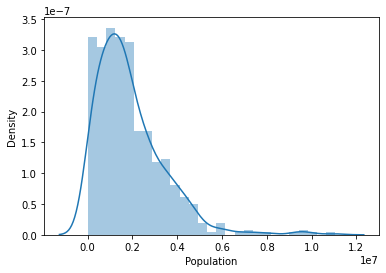

In [152]:
sns.distplot((df2['Population'].astype(int)))
plt.show()

/Users/apple/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='private_Population', ylabel='Density'>

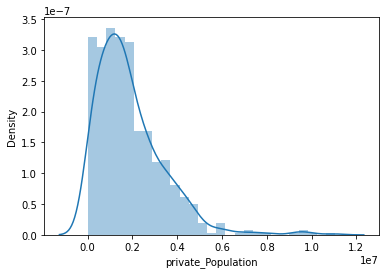

In [153]:
sns.distplot((df2['private_Population'].astype(float)))

In [163]:
xa = np.linspace(0,640,640)

In [164]:
y1 = df2['Power_Parity_Above_Rs_545000'].astype(int)
y2 = df2['private_Power_Parity_Above_Rs_545000'].astype(float)

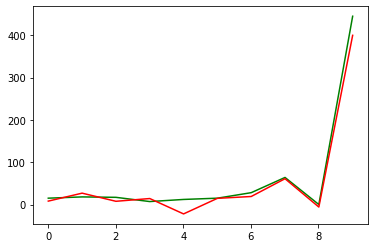

In [167]:
plt.plot(xa[0:10],y1[0:10], color='g')
plt.plot(xa[0:10],y2[0:10], color='r')
# plt.scatter(xa,y2[0:10])
plt.show()

In [114]:
y1[0:11].shape

(11,)